# Learning outcomes
1. Download online images
2. Read, save and display images
3. Same operation (2) on videos
4. Resize images
   * Resize interpolation methods:
     * Nearest neighbor
     * Bilinear
     * Cubic
     * Lanczos

# Setup

In [1]:
import sys
#assert that it is Python version 3.8
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

#check whether opencv is running on optimized code
if not cv.useOptimized():
    cv.setUseOptimized(True)

print(f"Is OpenCV running on optimized code? {cv.useOptimized()}")

Is OpenCV running on optimized code? True


# Download online images

In [2]:
from urllib.request import urlretrieve
url = "https://th.bing.com/th/id/OIP.zzwp0iX1xhfhqDM2LongzAHaGd?rs=1&pid=ImgDetMain"
urlretrieve(url, "images/onepiece.jpg")

('images/onepiece.jpg', <http.client.HTTPMessage at 0x219efc237f0>)

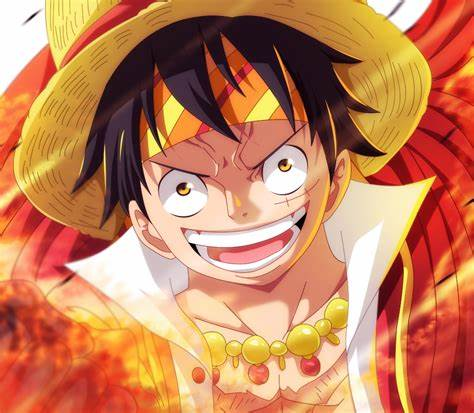

In [3]:
from IPython.display import Image
Image("images/onepiece.jpg")

In [4]:
from utils import download_save_image
download_save_image(url, "images/onepiece.jpg")

# Read, display and save images with OpenCV


In [5]:
# read and display JPEG file
# images can be categories into color (3D array) or grayscale (2D array)
img = cv.imread("images/lena.jfif") # color
img_grayscale = cv.imread("images/lena.jfif", 0) # grayscale

cv.imshow("color", img)
cv.imshow("grayscale", img_grayscale)
cv.waitKey(0)  # the window will not quit unless receive user keystoke
cv.destroyAllWindows

<function destroyAllWindows>

In [6]:
from utils import display_images

display_images([img, img_grayscale],("color", "grayscale"))

In [7]:
#TIFF and png
img_tif = cv.imread("images/lena.tif")
img_png = cv.imread("images/lena.png")

display_images([img_tif, img_png], ("tif", "png"))

## Issue with GIF

In [10]:
import imageio

ModuleNotFoundError: No module named 'imageio'

## read, display and save images at once

In [11]:
img = cv.imread("images/onepiece.jpg")

if img is None:
    sys.exit("Image file path not exist")

cv.imshow("nature", img)
k = cv.waitKey(0) & 0xFF
if k == ord('s'):
    cv.imwrite("nature1.jpg",img)

cv.destroyAllWindows()

# read,display and save video

In [14]:
cap = cv.VideoCapture("videos/img_pexels.mp4")  # 0 :webcam, filepath

if not cap.isOpened():
    raise Exception("The video path not present")

# to save the video file, we need width, height, fourcc, fps to define a videowriter API
width = int(cap.get(3))
height = int(cap.get(4))
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
fps = 15
out = cv.VideoWriter('pexels_save.avi',fourcc, fps, (width, height))

# read frame with loop
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Frame not received")
        break

    # save the video
    out.write(frame)
    
    cv.namedWindow("frame",cv.WINDOW_NORMAL)
    cv.imshow("frame", frame)

    if cv.waitKey(1) & 0xFF == 27:  # Escape keystroke
        break

cap.release()
out.release()
cv.destroyAllWindows()

## Image resizing

## 1st way (deep learning project)
```
cv.resize(img, (w, h), interpolation)
```

## 2nd way (maintaining the aspect ratio)
```
cv.resize(img, None, fx=0.5, fy=0.5, interpolation)
```

In [16]:
img= cv.imread("images/onepiece.jpg")
new_dim = (300,500)
img_small = cv.resize(img, new_dim, interpolation=cv.INTER_LINEAR)

display_images([img, img_small], ("original", "resized"))

In [17]:
img = cv.imread("images/soccer.jpg")
# the reasonable range [0.2, 5]
img_large = cv.resize(img, None, fx=1.6, fy=1.6, interpolation=cv.INTER_LINEAR)

display_images([img, img_large], ("original", "resized"))

# Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.


In [1]:
import cv2 as cv
import numpy as np

In [2]:
# Question 1
img = cv.imread('images/dog.jfif')
cv.imshow('original', img)

cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('images/dog.png', img)

True

2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [6]:
# Question 2
# Method 1 
img = cv.imread('images/onepiece.jpg')
img_graysclae = cv.imread('images/onepiece.jpg', 0)
cv.imshow('color', img)
cv.imshow('grayscale', img_graysclae)

cv.waitKey(0)
cv.destroyAllWindows()

# Method 2
img_grayscale2 = cv.cvtColor(img_graysclae, cv.COLOR_GRAY2BGR)
method2= np.concatenate((img, img_grayscale2))

cv.imshow('Attached images', method2)
cv.waitKey(0)
cv.destroyAllWindows()

3. Write codes that performs the following:
   
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [9]:
# Question 3
cap = cv.VideoCapture('videos/img_pexels.mp4')

if not cap.isOpened():
    raise Exception("No video")

# save the video
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fourcc = cv.VideoWriter_fourcc('M', 'J','P','G')
fps=cap.get(cv.CAP_PROP_FPS)

# new width, height
new_width = width // 2
new_height = height // 2

out = cv.VideoWriter('videos/smaller_img_pexels.mp4', fourcc, fps, (new_width, new_height))

# display the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame")
        break

    #resize frame
    new_frame = cv.resize(frame,(new_width, new_height))
    out.write(new_frame)

    cv.namedWindow("frame",cv.WINDOW_NORMAL)
    cv.imshow('frame', new_frame)
    
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()
cap.release()
out.release()

4. Enlarge the image "dog.jfif" by using different techniques:
    * Linear interpolation
    * Cubic interpolation
    * Nearest neighbor interpolation.